# Neural Network - Gas_Turbine_Problem
## ------------------------------------------------------------------------------------------------------------------------------
## Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

## 1. Import necessary libraries :

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [50]:
gas_turbine_data = pd.read_csv('gas_turbines.csv',sep=',')
gas_turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## 3. Data Understanding :

### 3.1 About data : 
### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

### Attribute Information:

### The explanations of sensor measurements and their brief statistics are given below.

### * **Variable (Abbr.)**        **Unit** **Min** **Max** **Mean**
#### * **1.  Ambient temperature (AT)** C â€“ 6.23      37.10   17.71
#### * **2.  Ambient pressure (AP)**    mbar  985.85   1036.56 1013.07
#### * **3.  Ambient humidity (AH)**    (%)   24.08    100.20  77.87
#### * **4.  Air filter difference pressure (AFDP)** mbar 2.09   7.61   3.93
#### * **5.  Gas turbine exhaust pressure (GTEP)** mbar  17.70   40.72   25.56
#### * **6.  Turbine inlet temperature (TIT)** C      1000.85   1100.89   1081.43
#### * **7.  Turbine after temperature (TAT)** C      511.04 550.61 546.16
#### * **8.  Compressor discharge pressure (CDP)** mbar 9.85 15.16 12.06
#### * **9.  Turbine energy yield (TEY)** MWH 100.02 179.50 133.51
#### * **10. Carbon monoxide (CO)** mg/m3 0.00 44.10 2.37
#### * **11. Nitrogen oxides (NOx)** mg/m3 25.90 119.91 65.29

### 3.2 Initial Analysis :

In [5]:
gas_turbine_data.shape

(15039, 11)

In [6]:
gas_turbine_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
gas_turbine_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

## 4. Data Preparation :

In [8]:
gas_turbine_data_1 = gas_turbine_data.copy()

In [9]:
gas_turbine_data_1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


### 4.1 Dropping the features :

In [10]:
gas_turbine_data_1.drop(labels= ['GTEP','TIT','TAT','CDP','CO','NOX'],axis=1,inplace=True)
gas_turbine_data_1.head()

,AT,AP,AH,AFDP,TEY
0,6.8594,1007.9,96.799,3.5000,114.70
1,6.7850,1008.4,97.118,3.4998,114.72
2,6.8977,1008.8,95.939,3.4824,114.71
3,7.0569,1009.2,95.249,3.4805,114.72
4,7.3978,1009.7,95.150,3.4976,114.72


In [11]:
gas_turbine_data_1.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
TEY     0
dtype: int64

In [12]:
gas_turbine_data_1.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
TEY     float64
dtype: object

In [13]:
gas_turbine_data_1.shape

(15039, 5)

## 5. Model Building :

### 5.1 Building the input and output variable :

In [14]:
X = gas_turbine_data_1.drop(labels='TEY',axis=1)
y = gas_turbine_data_1[['TEY']]

### 5.2 Normalising the values :

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
min_max_scaler = MinMaxScaler()
scaled_x = min_max_scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_x,columns=X.columns)
X_scaled

,AT,AP,AH,AFDP
0,0.184182,0.456050,0.951314,0.255758
1,0.182020,0.466391,0.955881,0.255721
2,0.185295,0.474664,0.939003,0.252571
3,0.189922,0.482937,0.929126,0.252227
4,0.199830,0.493278,0.927708,0.255323
...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380
15035,0.214075,0.414685,0.984153,0.256826
15036,0.195962,0.422958,0.989922,0.251593
15037,0.188443,0.433299,0.982936,0.246451


## 6. Model Training :

In [17]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=12,test_size=0.30)

In [30]:
X_train.shape,X_test.shape

((10527, 4), (4512, 4))

In [31]:
y_train.shape,y_test.shape

((10527, 1), (4512, 1))

## -----------------------------------------------------------------------------------------------------------------------------------

# Neural Networks Concept :

## 7. Model Building and Training:

In [32]:
from keras.models import Sequential
from keras.layers import Dense

In [33]:
model_1 = Sequential()
model_1.add(Dense(units = 500,activation='relu',input_dim = 4))
model_1.add(Dense(units = 300,activation='elu'))
model_1.add(Dense(units = 100,activation='softmax'))
model_1.add(Dense(units = 1,activation='relu'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               2500      
                                                                 
 dense_5 (Dense)             (None, 300)               150300    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 183,001
Trainable params: 183,001
Non-trainable params: 0
_________________________________________________________________


## 8. Model Compilation :

In [34]:
model_1.compile(optimizer='rmsprop',loss='mean_absolute_error',metrics=['mae','accuracy'])

## 9. Training the model:

In [35]:
model_1.fit(x=X_train,y=y_train,batch_size=100,epochs=30,verbose=2)

Epoch 1/30
106/106 - 2s - loss: 133.8563 - mae: 133.8563 - accuracy: 0.0000e+00 - 2s/epoch - 16ms/step
Epoch 2/30
106/106 - 1s - loss: 133.6304 - mae: 133.6304 - accuracy: 0.0000e+00 - 638ms/epoch - 6ms/step
Epoch 3/30
106/106 - 1s - loss: 133.4184 - mae: 133.4184 - accuracy: 0.0000e+00 - 652ms/epoch - 6ms/step
Epoch 4/30
106/106 - 1s - loss: 133.2064 - mae: 133.2064 - accuracy: 0.0000e+00 - 634ms/epoch - 6ms/step
Epoch 5/30
106/106 - 1s - loss: 132.9944 - mae: 132.9944 - accuracy: 0.0000e+00 - 631ms/epoch - 6ms/step
Epoch 6/30
106/106 - 1s - loss: 132.7824 - mae: 132.7824 - accuracy: 0.0000e+00 - 662ms/epoch - 6ms/step
Epoch 7/30
106/106 - 1s - loss: 132.5704 - mae: 132.5704 - accuracy: 0.0000e+00 - 682ms/epoch - 6ms/step
Epoch 8/30
106/106 - 1s - loss: 132.3585 - mae: 132.3585 - accuracy: 0.0000e+00 - 659ms/epoch - 6ms/step
Epoch 9/30
106/106 - 1s - loss: 132.1464 - mae: 132.1464 - accuracy: 0.0000e+00 - 666ms/epoch - 6ms/step
Epoch 10/30
106/106 - 1s - loss: 131.9344 - mae: 131.9344

## 10. Finding the best optimal parameters:

### I. Dataset :

In [58]:
gas_turbine_data_2 = gas_turbine_data_1.copy()
gas_turbine_data_2.head()

,AT,AP,AH,AFDP,TEY
0,6.8594,1007.9,96.799,3.5000,114.70
1,6.7850,1008.4,97.118,3.4998,114.72
2,6.8977,1008.8,95.939,3.4824,114.71
3,7.0569,1009.2,95.249,3.4805,114.72
4,7.3978,1009.7,95.150,3.4976,114.72


### II. Data Pre-Processing :

In [59]:
#Setting Target Features and Predicting Features
TargetVariable = ['TEY']
Predictors = ['AT','AP','AH','AFDP']

#Setting Target Variable and Predicting Variable
X_1= gas_turbine_data_2[Predictors].values
y_1= gas_turbine_data_2[TargetVariable].values

In [60]:
# Sandardization of data ###
from sklearn.preprocessing import MinMaxScaler
PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()

#Fitting of the values
PredictorScalerFit=PredictorScaler.fit(X_1)
TargetVarScalerFit=TargetVarScaler.fit(y_1)
 
# Generating the standardized values of X and y
X_transformed=PredictorScalerFit.transform(X_1)
y_transformed=TargetVarScalerFit.transform(y_1)

### III. Model Training :

In [61]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.30, random_state=12) 

In [62]:
(X_train.shape,X_test.shape)

((10527, 4), (4512, 4))

In [63]:
(y_train.shape,y_test.shape)

((10527, 1), (4512, 1))

### IV. Best Model Building and Training:

In [64]:
def BestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[50, 100, 125, 150,200]
    epoch_list  =   [30, 50, 100, 150,175]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model_1 = Sequential()
            # Defining the first layer of the model
            model_1.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='sigmoid'))
 
            # Defining the Second layer of the model
            model_1.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
        
            # Defining the third layer of the model
            model_1.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model_1.add(Dense(1, kernel_initializer='normal',activation = 'elu'))
 
            # Compiling the model
            model_1.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model_1.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = (np.mean(100*(np.abs(y_test-model_1.predict(X_test))/y_test)))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 

 #Calling the function
ResultsData = BestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 50 - epochs: 30 Accuracy: 56.682174419693055
2 Parameters: batch_size: 50 - epochs: 50 Accuracy: 56.00179749504287
3 Parameters: batch_size: 50 - epochs: 100 Accuracy: 57.300002760076374
4 Parameters: batch_size: 50 - epochs: 150 Accuracy: 57.016262090753095
5 Parameters: batch_size: 50 - epochs: 175 Accuracy: 55.56892174937524
6 Parameters: batch_size: 100 - epochs: 30 Accuracy: 54.68489987386609
7 Parameters: batch_size: 100 - epochs: 50 Accuracy: 30.838887772563197
8 Parameters: batch_size: 100 - epochs: 100 Accuracy: 31.208255321693642
9 Parameters: batch_size: 100 - epochs: 150 Accuracy: 55.14532589945297
10 Parameters: batch_size: 100 - epochs: 175 Accuracy: 54.69842640118648
11 Parameters: batch_size: 125 - epochs: 30 Accuracy: 53.413256577861475
12 Parameters: batch_size: 125 - epochs: 50 Accuracy: 55.70196886800971
13 Parameters: batch_size: 125 - epochs: 100 Accuracy: 56.8095953242883
14 Parameters: batch_size: 125 - epochs: 150 Accuracy: 30.66264519

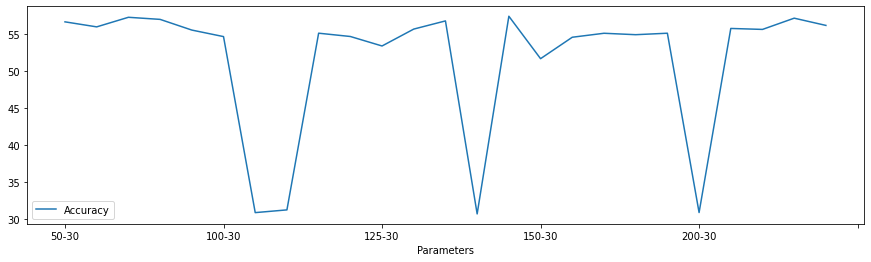

In [65]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')
plt.show()

## 11. Predictions :

In [66]:
# Fitting the ANN to the Training set
model_1.fit(X_train, y_train ,batch_size = 125, epochs = 175, verbose=0)
 
# Generating Predictions on testing data
Predictions = model_1.predict((X_test))

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Original_TEY'] = y_test_orig
TestingData['Predicted_TEY']=Predictions
TestingData.head(20)

,AT,AP,AH,AFDP,Original_TEY,Predicted_TEY
0,17.4730,1016.5,86.252,3.4721,112.06,109.493706
1,15.3180,1019.0,87.217,2.6364,127.18,128.968277
2,7.0389,1012.3,92.654,3.4710,132.70,114.520699
3,11.6440,1013.3,85.795,5.5408,159.95,159.479126
4,21.3680,1021.2,79.015,4.2917,132.85,133.943726
5,17.6150,1011.9,99.698,2.9327,132.99,114.599922
6,19.9140,1000.6,70.645,4.6168,132.72,133.721008
7,31.4370,1009.0,47.035,4.2043,133.74,133.789948
8,17.4710,1009.1,77.134,3.5195,110.72,123.430588
9,28.4450,1016.8,55.753,4.1556,133.76,133.976105


In [68]:
model_1.evaluate(X_train,y_train,verbose=1)[0]

329/329 [==============================] - 2s 3ms/step - loss: 0.0705 - mae: 0.0705 - accuracy: 1.8999e-04


0.07049428671598434

In [70]:
# Fitting the ANN to the Training set
model_1.fit(X_train, y_train ,batch_size = 125, epochs = 175, verbose=0)
 
# Generating Predictions on testing data
Predictions = model_1.predict((X_train))

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_train_orig=TargetVarScalerFit.inverse_transform(y_train)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_train)
 
TrainingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TrainingData['Original_TEY'] = y_train_orig
TrainingData['Predicted_TEY']=Predictions
TrainingData.head(20)

,AT,AP,AH,AFDP,Original_TEY,Predicted_TEY
0,32.313,1010.5,38.015,4.6424,150.96,148.205338
1,27.693,1017.3,54.875,3.5559,110.78,111.635338
2,30.908,1010.3,51.289,4.5602,134.78,142.752365
3,12.187,1017.2,92.389,2.8928,133.05,133.955292
4,20.260,1005.6,86.535,3.1074,113.18,112.018997
5,18.478,1014.4,74.930,4.3370,135.43,144.051987
6,31.233,1009.0,46.442,4.8158,148.41,148.937363
7,11.060,1021.7,80.436,5.6009,160.68,161.587173
8,16.390,1007.0,89.559,4.7004,149.37,138.322464
9,21.531,1008.6,75.576,3.9081,134.25,133.852127


In [71]:
model_1.evaluate(X_train,y_train,verbose=1)[0]

329/329 [==============================] - 1s 3ms/step - loss: 0.0596 - mae: 0.0596 - accuracy: 1.8999e-04


0.05958973616361618

In [74]:
# Computing the absolute percent error for training data
APE=100*(abs(TrainingData['Original_TEY']-TestingData['Predicted_TEY'])/TrainingData['Original_TEY'])
TrainingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TrainingData.head()

The Accuracy of ANN model is: 87.3649095599888


,AT,AP,AH,AFDP,Original_TEY,Predicted_TEY,APE
0,32.313,1010.5,38.015,4.6424,150.96,148.205338,27.468398
1,27.693,1017.3,54.875,3.5559,110.78,111.635338,16.418376
2,30.908,1010.3,51.289,4.5602,134.78,142.752365,15.031386
3,12.187,1017.2,92.389,2.8928,133.05,133.955292,19.864056
4,20.260,1005.6,86.535,3.1074,113.18,112.018997,18.345755


In [75]:
# Computing the absolute percent error for test data
APE=100*(abs(TestingData['Original_TEY']-TestingData['Predicted_TEY'])/TestingData['Original_TEY'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 95.84401560995197


,AT,AP,AH,AFDP,Original_TEY,Predicted_TEY,APE
0,17.4730,1016.5,86.252,3.4721,112.06,109.493706,2.290107
1,15.3180,1019.0,87.217,2.6364,127.18,128.968277,1.406099
2,7.0389,1012.3,92.654,3.4710,132.70,114.520699,13.699549
3,11.6440,1013.3,85.795,5.5408,159.95,159.479126,0.294388
4,21.3680,1021.2,79.015,4.2917,132.85,133.943726,0.823279
